# Initiation

Import library yang diperlukan

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

Mengatur ukuran gambar dan style matplotlib

In [110]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Dataset Kaggle: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data

Import Dataset

In [111]:
df_customer = pd.read_csv('https://drive.google.com/uc?id=1fV8QZgH6Qcyi-uf_T557e9qXz-En7hE4')

In [112]:
df_customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Data Exploration

## Eksplorasi Dasar

Melihat ukuran dataset

In [113]:
df_customer.shape

(3900, 18)

Melihat informasi dataset

In [114]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Deskripsi dataset tipe angka

In [115]:
df_customer.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Pemisahan Tipe Kolom

Melihat banyaknya nilai unik

In [116]:
df_customer.nunique()

,0
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


Melihat nilai masing-masing nilai unik pada setiap kolom

In [117]:
iter = 0

for i in range(0,len(df_customer.columns)):
  print(i+1,  df_customer.columns[i] , df_customer[df_customer.columns[i]].unique())
  iter += 1

1 Customer ID [   1    2    3 ... 3898 3899 3900]
2 Age [55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
3 Gender ['Male' 'Female']
4 Item Purchased ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
5 Category ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
6 Purchase Amount (USD) [ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]
7 Location ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Lo

Pemisahan antara angka dengan objek

In [118]:
kolom_angka = []
kolom_objek = []

for i in range(0, len(df_customer.columns)):
  if (df_customer.dtypes.iloc[i] != 'object'):
    kolom_angka.append(df_customer.columns[i])
  else:
    kolom_objek.append(df_customer.columns[i])

kolom_angka.remove('Customer ID')

print(kolom_angka)
print(kolom_objek)

['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


## Eksplorasi Angka

Boxplot untuk melihat outlier

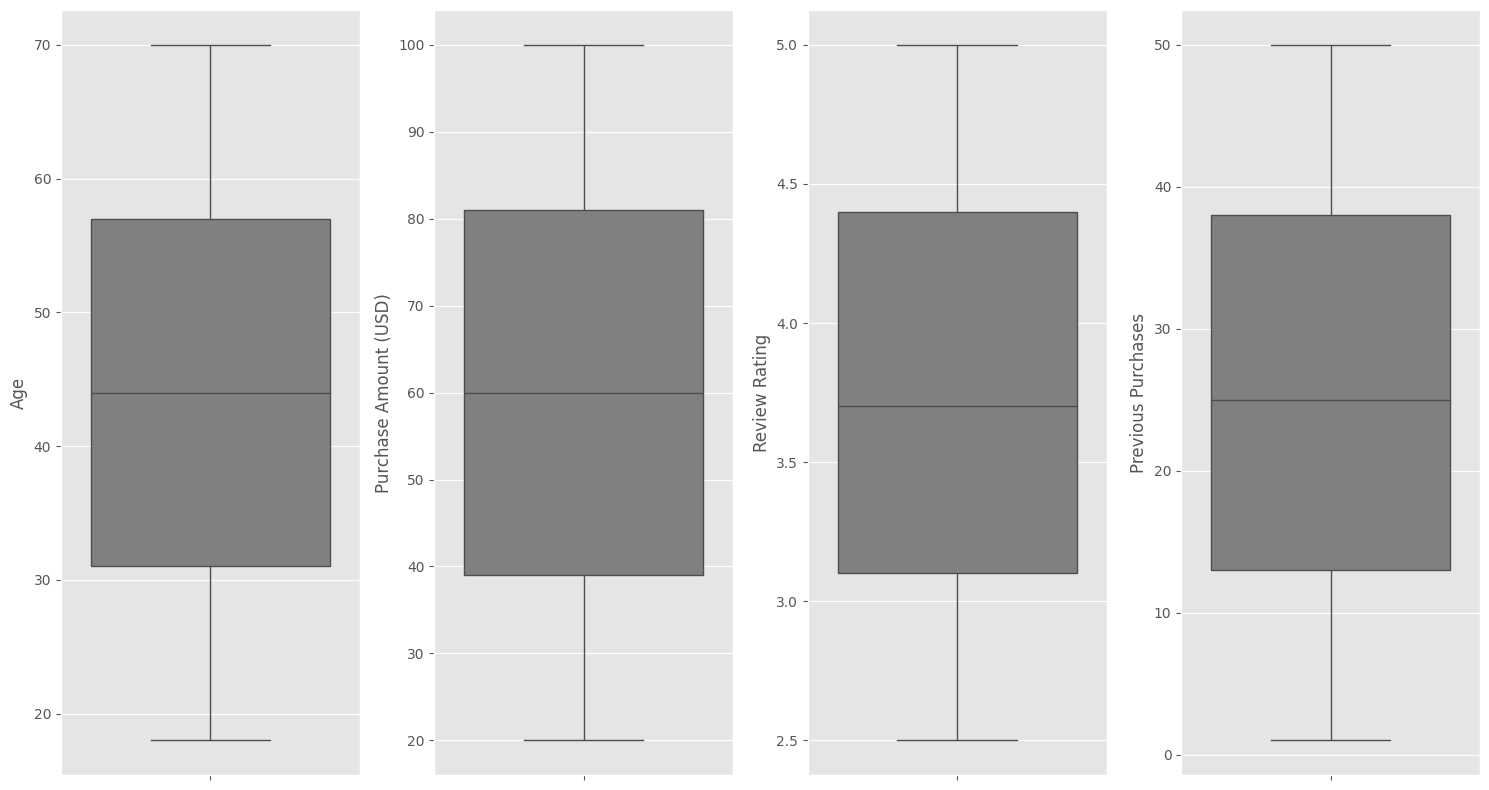

In [119]:
for i in range(0, len(kolom_angka)):
    plt.subplot(1, len(kolom_angka), i+1)
    sns.boxplot(y=df_customer[kolom_angka[i]], color='gray', orient='v')
    plt.tight_layout()

Distribution plot

<ipython-input-120-fa88cc9d709c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer[kolom_angka[i]], color='gray')
<ipython-input-120-fa88cc9d709c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer[kolom_angka[i]], color='gray')
<ipython-input-120-fa88cc9d709c>:3: UserWarnin

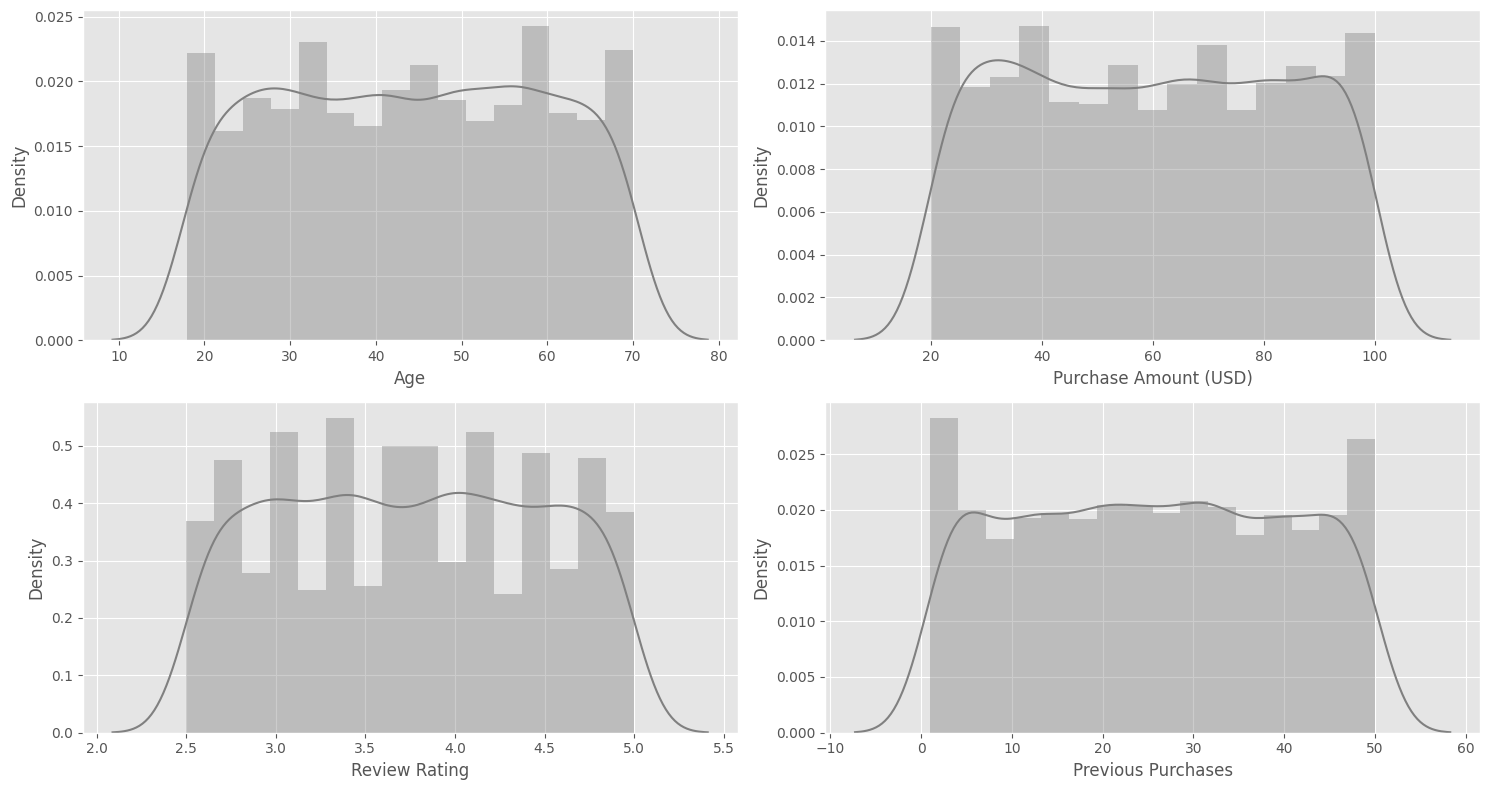

In [120]:
for i in range(0, len(kolom_angka)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df_customer[kolom_angka[i]], color='gray')
    plt.tight_layout()

## Eksplorasi Objek

Pemisahan berdasarkan banyaknya nilai unik

In [121]:
df_customer[kolom_objek].nunique() < 10

,0
Gender,True
Item Purchased,False
Category,True
Location,False
Size,True
Color,False
Season,True
Subscription Status,True
Shipping Type,True
Discount Applied,True


Proses pemisahan

In [122]:
temp_less10 = df_customer[kolom_objek].nunique() < 10
final_less10 = []
final_more10 = []

for i in range(0, len(temp_less10)):
    if (temp_less10[i] == True):
        final_less10.append(temp_less10.index[i])
    else:
        final_more10.append(temp_less10.index[i])

print(final_less10)
print("\n\n", final_more10)

['Gender', 'Category', 'Size', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


 ['Item Purchased', 'Location', 'Color']


<ipython-input-122-2654fb8b7352>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (temp_less10[i] == True):


Eksplorasi visualisasi dengan bar plot

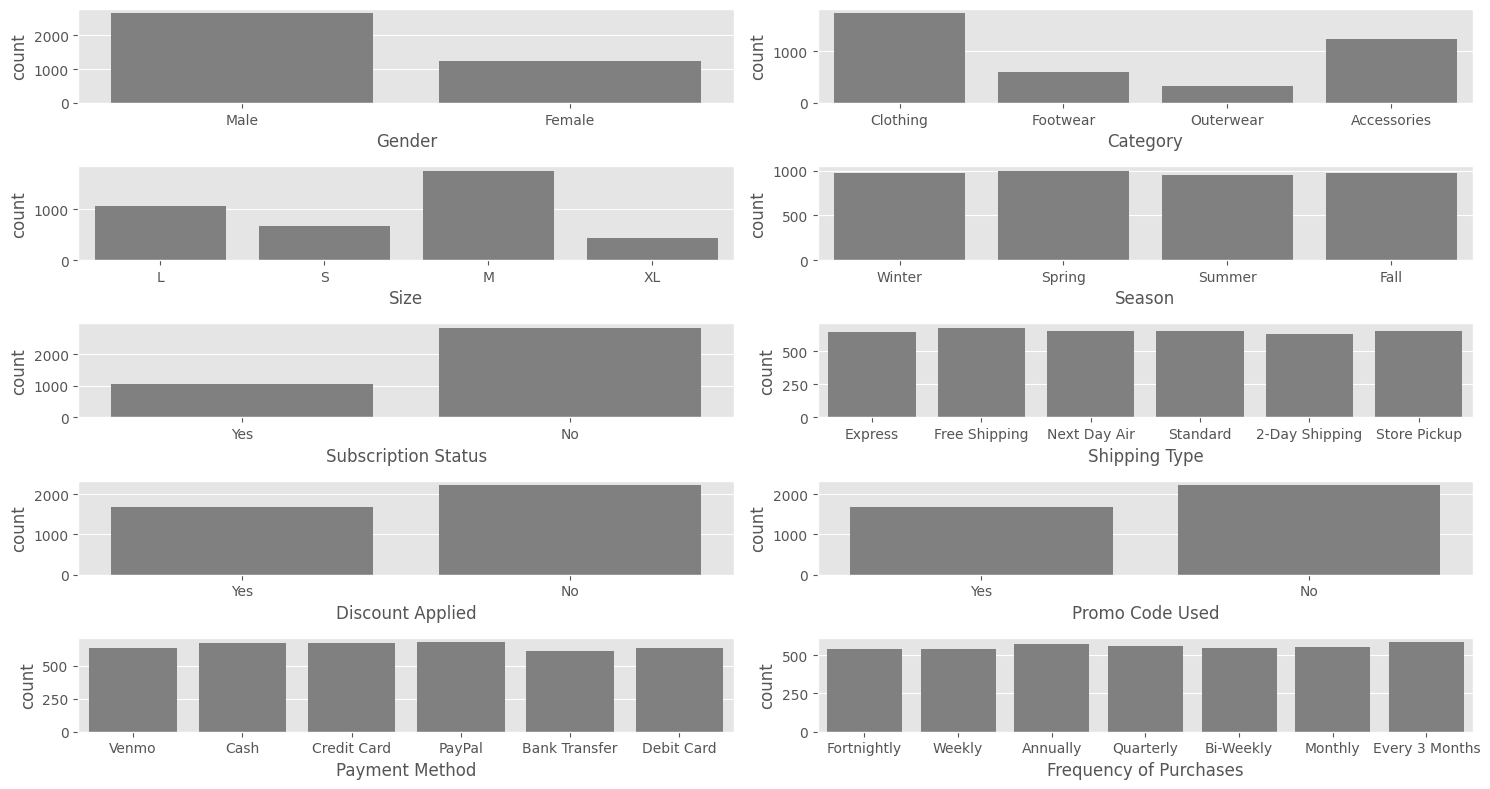

In [123]:
for i in range(0, len(final_less10)):
    plt.subplot(5, 2, i+1)
    sns.countplot(df_customer, x= final_less10[i], color='gray', orient='v')
    plt.tight_layout()

Mendapatkan nilai unik dengan kolom yang di atas 10 nilai unik

In [124]:
df_customer[final_more10].value_counts()

for i in range(0, len(final_more10)):
  print(df_customer[final_more10[i]].nunique())
  print(df_customer[final_more10[i]].unique())

25
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
50
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']
25
['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'In

Melihat nilai unik dan banyaknya (count)

In [125]:
df_customer[final_more10[0]].value_counts()

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Sunglasses,161


In [126]:
df_customer[final_more10[1]].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


In [127]:
df_customer[final_more10[2]].value_counts()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


# Data Preprocessing

## Binary Encoding

Mengubah data tipe binary objek menjadi angka 0 atau 1

In [128]:
temp_gender = df_customer['Gender'].map({'Female': 1, 'Male': 0})
temp_subs = df_customer['Subscription Status'].map({'Yes': 1, 'No': 0})
temp_disc = df_customer['Discount Applied'].map({'Yes': 1, 'No': 0})
temp_promo = df_customer['Promo Code Used'].map({'Yes': 1, 'No': 0})

In [129]:
biner_list = [temp_gender, temp_subs, temp_disc, temp_promo]
df_train = pd.concat(biner_list, axis=1)
df_train.columns = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']

df_train.sample(10)

,Gender,Subscription Status,Discount Applied,Promo Code Used
2015,0,0,0,0
2142,0,0,0,0
2836,1,0,0,0
3663,1,0,0,0
3333,1,0,0,0
2148,0,0,0,0
1455,0,0,1,1
364,0,1,1,1
2375,0,0,0,0
2163,0,0,0,0


## Ordinal Encoding

Mengubah tipe data ordinal objek menjadi angka berurut

In [130]:
print(df_customer['Size'].unique())
print(df_customer['Frequency of Purchases'].unique())

['L' 'S' 'M' 'XL']
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [131]:
temp_size = df_customer['Size'].map({'S': 0, 'M': 1, 'L': 2, 'XL': 3})
temp_freq = df_customer['Frequency of Purchases'].map({
    'Annually': 0, 'Quarterly': 1, 'Every 3 Months': 1, 'Monthly': 2,
    'Fortnightly': 3, 'Weekly': 4, 'Bi-Weekly': 5
    })

In [132]:
ordinal_list = [temp_size, temp_freq]
new_col = pd.concat(ordinal_list, axis=1)
df_train[['Size', 'Frequency of Purchases']] = new_col

df_train.sample(10)

,Gender,Subscription Status,Discount Applied,Promo Code Used,Size,Frequency of Purchases
1044,0,1,1,1,2,1
1698,0,0,0,0,3,1
2112,0,0,0,0,1,3
943,0,1,1,1,2,3
533,0,1,1,1,2,4
3311,1,0,0,0,2,0
709,0,1,1,1,2,2
984,0,1,1,1,1,5
2658,1,0,0,0,3,2
2710,1,0,0,0,2,3


Menggabungkan kolom objek dengan kolom angka sebelumnya pada Data Exploration

In [133]:
df_train = pd.concat([df_train, df_customer[kolom_angka]], axis=1)
df_train.sample(5)

,Gender,Subscription Status,Discount Applied,Promo Code Used,Size,Frequency of Purchases,Age,Purchase Amount (USD),Review Rating,Previous Purchases
2684,1,0,0,0,1,5,46,45,4.7,42
2412,0,0,0,0,1,5,53,51,4.3,8
3784,1,0,0,0,1,0,54,53,4.5,4
832,0,1,1,1,2,5,58,80,2.5,28
648,0,1,1,1,1,4,22,31,4.1,35


In [134]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')
# plt.show()

## One Hot Encoding

Mengubah tipe data kategori atau nominal menjadi kolom baru dengan OHE

In [135]:
temp_paymeth = pd.get_dummies(df_customer['Payment Method'], dtype=int)
temp_category = pd.get_dummies(df_customer['Category'], dtype=int)
temp_season = pd.get_dummies(df_customer['Season'], dtype=int)
temp_ship = pd.get_dummies(df_customer['Shipping Type'], dtype=int)
# temp_item_purchased = pd.get_dummies(df_customer['Item Purchased'], drop_first=False, dtype=int)
# temp_location = pd.get_dummies(df_customer['Location'], drop_first=False, dtype=int)
# temp_color = pd.get_dummies(df_customer['Color'], drop_first=False, dtype=int)

In [136]:
nominal_list = [temp_paymeth, temp_category, temp_season, temp_ship]
# nominal_list = [temp_paymeth, temp_category, temp_season, temp_ship, temp_item_purchased, temp_location, temp_color]
new_col2 = pd.concat(nominal_list, axis=1)
df_train = pd.concat([df_train, new_col2], axis=1)

df_train.sample(5)

,Gender,Subscription Status,Discount Applied,Promo Code Used,Size,Frequency of Purchases,Age,Purchase Amount (USD),Review Rating,Previous Purchases,...,Fall,Spring,Summer,Winter,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
1329,0,0,1,1,1,1,70,63,3.3,50,...,1,0,0,0,0,1,0,0,0,0
3814,1,0,0,0,1,1,45,95,4.2,26,...,0,0,0,1,0,0,1,0,0,0
2902,1,0,0,0,0,5,27,32,4.6,19,...,0,1,0,0,0,0,0,0,1,0
3699,1,0,0,0,1,4,51,55,2.6,24,...,1,0,0,0,0,0,0,0,0,1
526,0,1,1,1,0,2,51,52,4.9,19,...,0,0,0,1,0,0,0,0,1,0


## Scaling

Dengan MinMax Scaling (Normalization Scaling) untuk mengubah range menjadi [0,1]

In [137]:
scaler= MinMaxScaler()
scale_df = scaler.fit_transform(df_train)
scale_df

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [138]:
df_train_scale = pd.DataFrame(scale_df, index=df_train.index, columns=df_train.columns)
df_train_scale.sample(10)

,Gender,Subscription Status,Discount Applied,Promo Code Used,Size,Frequency of Purchases,Age,Purchase Amount (USD),Review Rating,Previous Purchases,...,Fall,Spring,Summer,Winter,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
50,0.0,1.0,1.0,1.0,0.333333,1.0,0.596154,0.1000,0.48,0.775510,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1902,0.0,0.0,0.0,0.0,0.000000,0.4,0.250000,0.0250,1.00,0.408163,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1398,0.0,0.0,1.0,1.0,0.333333,0.8,0.230769,0.3125,0.00,0.489796,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
373,0.0,1.0,1.0,1.0,0.666667,1.0,0.096154,0.0875,0.84,0.204082,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1552,0.0,0.0,1.0,1.0,0.666667,0.4,0.692308,0.3625,0.20,0.387755,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
687,0.0,1.0,1.0,1.0,1.000000,0.2,0.019231,0.2250,0.32,0.918367,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1948,0.0,0.0,0.0,0.0,0.666667,1.0,0.692308,0.2125,0.24,0.775510,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1376,0.0,0.0,1.0,1.0,0.666667,0.0,0.750000,0.5625,1.00,0.469388,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2666,1.0,0.0,0.0,0.0,0.000000,0.6,0.596154,0.9375,0.64,0.265306,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1690,0.0,0.0,0.0,0.0,0.333333,0.0,0.423077,0.1250,0.28,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Ukuran Dataset Akhir

In [139]:
df_train_scale.shape

(3900, 30)

# Modeling

Untuk visualisasi dendrogram

In [140]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

Pembangunan model awal

In [141]:
model_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_clustering.fit(df_train_scale)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Hasil visualisas dendrogram

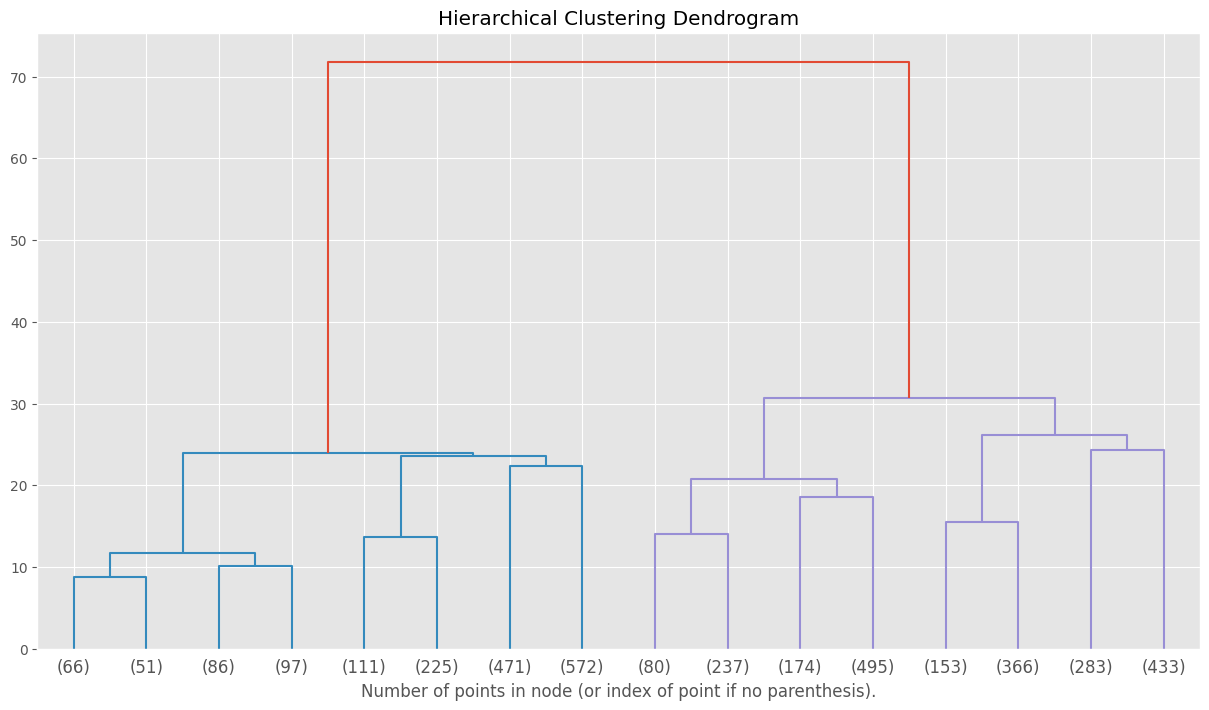

In [142]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model_clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Inisialisasi untuk Hyperparameter tuning

In [143]:
def make_generator(parameters):
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res

Hyperparameter tuning dengan banyak cluster dipilih berdasarkan hasil dendrogram, dan parameter yang akan dilakukan grid search sebagai berikut

In [144]:
fixed_params = {"n_clusters" : 2}

parameters_cluster = {
        'metric' : ['euclidean', 'cosine', 'manhattan', 'minkowski', 'braycurtis', 'canberra'],
        'linkage' : ['complete', 'average', 'single']
        }

Proses Hyperparameter Tuning

In [145]:
# ch_max = 0
df_score_optimal = np.array([])
i=0

for params in make_generator(parameters_cluster):
    params.update(fixed_params)
    ca = AgglomerativeClustering( **params )
    ca.fit(df_train_scale)
    labels = ca.labels_
    # print(params)
    # print('CH =', calinski_harabasz_score(df_train_scale, labels))
    # print('DB =', davies_bouldin_score(df_train_scale, labels))
    # print('S =', silhouette_score(df_train_scale, labels, metric=params['metric']), '\n')
    # if (calinski_harabasz_score(df_train_scale, labels) > ch_max):
    #   ch_max = calinski_harabasz_score(df_train_scale, labels)
    #   param_optimal = params
    new_row = np.array([params, silhouette_score(df_train_scale, labels, metric=params['metric']),
                        calinski_harabasz_score(df_train_scale, labels), davies_bouldin_score(df_train_scale, labels)])
    i += 1
    print("Processing ...", i)
    df_score_optimal = np.append(df_score_optimal, new_row)

# print('\n\nbest parameter = ',  param_optimal)
# print('best score = ', ch_max)

df_optimal_score = pd.DataFrame(df_score_optimal.reshape(-1,4), columns = ['parameter', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score' ])
df_optimal_score

Processing ... 1
Processing ... 2
Processing ... 3
Processing ... 4
Processing ... 5
Processing ... 6
Processing ... 7
Processing ... 8
Processing ... 9
Processing ... 10
Processing ... 11
Processing ... 12
Processing ... 13
Processing ... 14
Processing ... 15
Processing ... 16
Processing ... 17
Processing ... 18


,parameter,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,"{'linkage': 'complete', 'metric': 'euclidean',...",0.139173,655.37497,2.411587
1,"{'linkage': 'average', 'metric': 'euclidean', ...",0.140537,663.192704,2.397654
2,"{'linkage': 'single', 'metric': 'euclidean', '...",0.03751,1.189944,0.915491
3,"{'linkage': 'complete', 'metric': 'cosine', 'n...",0.127849,275.007147,3.518793
4,"{'linkage': 'average', 'metric': 'cosine', 'n_...",0.222117,661.974778,2.398667
5,"{'linkage': 'single', 'metric': 'cosine', 'n_c...",0.179736,1.053078,0.973165
6,"{'linkage': 'complete', 'metric': 'manhattan',...",0.232203,658.112034,2.407723
7,"{'linkage': 'average', 'metric': 'manhattan', ...",0.234159,664.389112,2.394457
8,"{'linkage': 'single', 'metric': 'manhattan', '...",0.057817,1.189944,0.915491
9,"{'linkage': 'complete', 'metric': 'minkowski',...",0.139173,655.37497,2.411587


Mengubah tipe data kolom yang entah mengapa di awal adalah object

In [146]:
df_optimal_score['calinski_harabasz_score'] = df_optimal_score['calinski_harabasz_score'].astype('float64')
df_optimal_score['silhouette_score'] = df_optimal_score['silhouette_score'].astype('float64')
df_optimal_score['davies_bouldin_score'] = df_optimal_score['davies_bouldin_score'].astype('float64')

df_optimal_score.dtypes

,0
parameter,object
silhouette_score,float64
calinski_harabasz_score,float64
davies_bouldin_score,float64


Membuat rank dengan hasil metrik evaluasi dan memberikan rank nya dari terbaik di rank 1 sampai dengan terburuk

In [147]:
# prompt: from df_optimal_score convert columns silhouette_score based on the highest value. The highest value = 1, 2nd highest = 2, until the lowest value. Do the same for calinski_harbasz_score column and do the opposite for davis_bouldin_score column.

# Assuming df_optimal_score is already defined as in your provided code

# Sort the DataFrame by each score column and assign ranks
df_optimal_score['silhouette_rank'] = df_optimal_score['silhouette_score'].rank(ascending=False, method='dense').astype(int)
df_optimal_score['calinski_rank'] = df_optimal_score['calinski_harabasz_score'].rank(ascending=False, method='dense').astype(int)
df_optimal_score['davis_rank'] = df_optimal_score['davies_bouldin_score'].rank(ascending=True, method='dense').astype(int)

# Display the updated DataFrame
df_optimal_score.sample(5)

,parameter,silhouette_score,calinski_harabasz_score,davies_bouldin_score,silhouette_rank,calinski_rank,davis_rank
9,"{'linkage': 'complete', 'metric': 'minkowski',...",0.139173,655.374970,2.411587,12,8,12
13,"{'linkage': 'average', 'metric': 'braycurtis',...",0.208947,667.953133,2.388979,6,1,5
3,"{'linkage': 'complete', 'metric': 'cosine', 'n...",0.127849,275.007147,3.518793,13,10,14
1,"{'linkage': 'average', 'metric': 'euclidean', ...",0.140537,663.192704,2.397654,10,4,8
11,"{'linkage': 'single', 'metric': 'minkowski', '...",0.037510,1.189944,0.915491,17,11,1


Melakukan pengurutan berdasarkan rata-rata ranking terendah

In [148]:
avg_rank = np.round((df_optimal_score['silhouette_rank'] + df_optimal_score['calinski_rank'] + df_optimal_score['davis_rank']) / 3, decimals=2)
df_optimal_score['average_rank'] = avg_rank
df_optimal_score.sort_values('average_rank', inplace=True)
df_optimal_score.round(3).head(5)

,parameter,silhouette_score,calinski_harabasz_score,davies_bouldin_score,silhouette_rank,calinski_rank,davis_rank,average_rank
7,"{'linkage': 'average', 'metric': 'manhattan', ...",0.234,664.389,2.394,1,2,6,3.00
13,"{'linkage': 'average', 'metric': 'braycurtis',...",0.209,667.953,2.389,6,1,5,4.00
16,"{'linkage': 'average', 'metric': 'canberra', '...",0.226,664.236,2.396,3,3,7,4.33
4,"{'linkage': 'average', 'metric': 'cosine', 'n_...",0.222,661.975,2.399,5,5,9,6.33
15,"{'linkage': 'complete', 'metric': 'canberra', ...",0.224,658.374,2.407,4,6,10,6.67


Ekspor hasil masing-masing model ke Excel

In [149]:
df_optimal_score.round(decimals=3).to_excel(r'top-model.xlsx', index=False, header=True)

Standard Deviation sebagai penentu kedua jika rank tertinggi memiliki nilai sama

In [150]:
df_optimal_score[['calinski_rank', 'davis_rank', 'silhouette_rank']].std(axis=1).head()

,0
7,2.645751
13,2.645751
16,2.309401
4,2.309401
15,3.055050


Mendapatkan parameter terbaik

In [151]:
param_optimal = df_optimal_score.iloc[0,0]
param_optimal

{'linkage': 'average', 'metric': 'manhattan', 'n_clusters': 2}

# Evaluation

Melakukan pembangunan model dengan parameter terbaik

In [152]:
optimal_cluster = AgglomerativeClustering( **param_optimal)
optimal_cluster.fit(df_train_scale)
new_cluster = optimal_cluster.labels_

Evaluasi hasil

In [153]:
print("Nilai Silhouette Score =", silhouette_score(df_train_scale, new_cluster, metric=param_optimal['metric']))
print("Nilai Calinski Harabasz Score =", calinski_harabasz_score(df_train_scale, new_cluster))
print("Nilai Davies Boouldin Score =", davies_bouldin_score(df_train_scale, new_cluster))

Nilai Silhouette Score = 0.23415891799596975
Nilai Calinski Harabasz Score = 664.3891124342204
Nilai Davies Boouldin Score = 2.39445690398032


Prediksi hasil cluster dan menaruh ke kolom terkanan

In [154]:
df_final = df_train_scale
df_final['Cluster'] = new_cluster
df_final.head(10)

,Gender,Subscription Status,Discount Applied,Promo Code Used,Size,Frequency of Purchases,Age,Purchase Amount (USD),Review Rating,Previous Purchases,...,Spring,Summer,Winter,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup,Cluster
0,0.0,1.0,1.0,1.0,0.666667,0.6,0.711538,0.4125,0.24,0.265306,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,1.0,1.0,0.666667,0.6,0.019231,0.5500,0.24,0.020408,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.0,1.0,1.0,1.0,0.000000,0.8,0.615385,0.6625,0.24,0.448980,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.0,1.0,1.0,1.0,0.333333,0.8,0.057692,0.8750,0.40,0.979592,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.0,1.0,1.0,1.0,0.333333,0.0,0.519231,0.3625,0.08,0.612245,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
5,0.0,1.0,1.0,1.0,0.333333,0.8,0.538462,0.0000,0.16,0.265306,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6,0.0,1.0,1.0,1.0,0.333333,0.2,0.865385,0.8125,0.28,0.979592,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
7,0.0,1.0,1.0,1.0,0.666667,0.8,0.173077,0.1750,0.28,0.367347,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
8,0.0,1.0,1.0,1.0,0.666667,0.0,0.153846,0.9625,0.04,0.142857,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
9,0.0,1.0,1.0,1.0,0.333333,0.2,0.750000,0.1375,0.92,0.061224,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


PCA untuk visualisasi

In [155]:
pca = PCA(n_components=2)
hasil_pca = pca.fit_transform(df_final.iloc[:,:-1])
df_pca = pd.DataFrame(hasil_pca, columns = ['principal component 1', 'principal component 2'])
df_pca_concat = pd.concat([df_pca, df_final.iloc[:,-1:].reset_index(drop=True)], axis = 1)
df_pca_concat.head()

,principal component 1,principal component 2,Cluster
0,1.085282,0.690902,1
1,1.068736,0.713563,1
2,1.063737,0.703109,1
3,1.109887,-0.169100,1
4,1.067009,0.673087,1


Tampung 2 cluster

In [156]:
cluster_0 = df_pca_concat[df_pca_concat['Cluster'] == 0]
cluster_1 = df_pca_concat[df_pca_concat['Cluster'] == 1]
# cluster_2 = df_pca_concat[df_pca_concat['Cluster'] == 2]
# cluster_3 = df_pca_concat[df_pca_concat['Cluster'] == 3]
# cluster_4 = df_pca_concat[df_pca_concat['Cluster'] == 4]
# cluster_5 = df_pca_concat[df_pca_concat['Cluster'] == 5]

Visualisasi hasil clustering dengan PCA

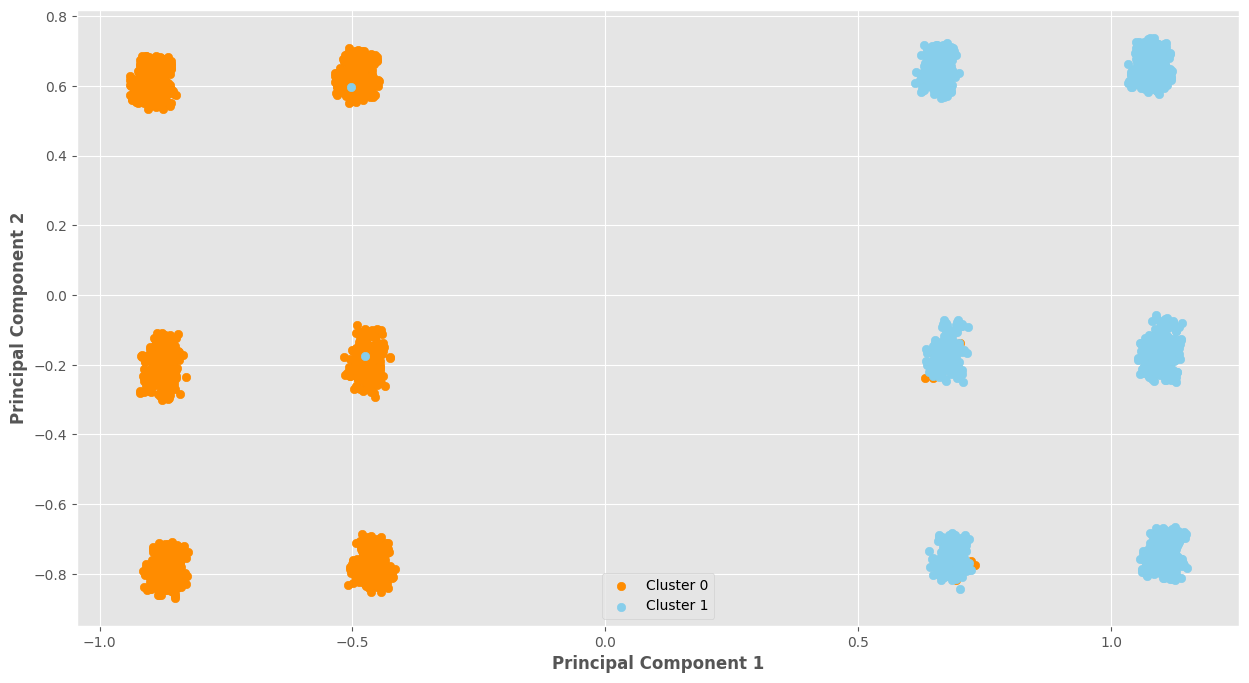

In [157]:
plt.scatter(x=cluster_0['principal component 1'], y=cluster_0['principal component 2'], color='darkorange')
plt.scatter(x=cluster_1['principal component 1'], y=cluster_1['principal component 2'], color='skyblue')
# plt.scatter(x=cluster_2['principal component 1'], y=cluster_2['principal component 2'], color='mediumseagreen')
# plt.scatter(x=cluster_3['principal component 1'], y=cluster_3['principal component 2'], color='yellow')
# plt.scatter(x=cluster_4['principal component 1'], y=cluster_4['principal component 2'], color='royalblue')
# plt.scatter(x=cluster_5['principal component 1'], y=cluster_5['principal component 2'], color='saddlebrown')
plt.xlabel('Principal Component 1', fontweight='bold')
plt.ylabel('Principal Component 2', fontweight='bold')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

Banyaknya anggota masing-masing cluster

In [158]:
df_pca_concat.value_counts('Cluster')

,count
Cluster,
0,2229
1,1671


Visualisasi pie plot masing-masing cluster

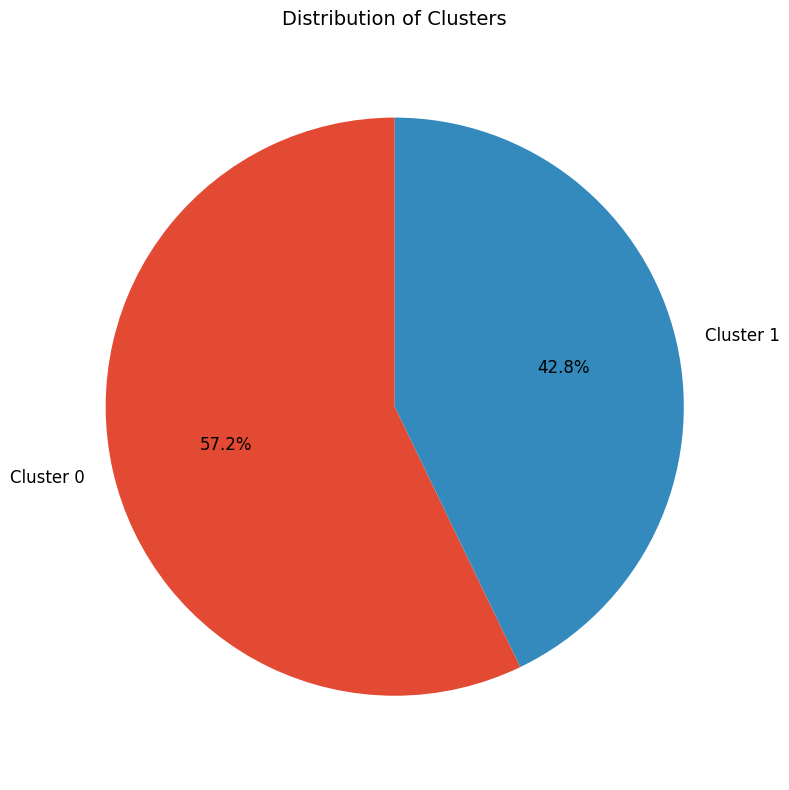

In [159]:
# prompt: plot df_pca_concat.value_counts('Cluster') in pie using matplotlib and the name of index in visualization using ['Cluster 0', 'Cluster 1', etc] instead of [0,1,etc] and make the cluster name not really far from pie

# Assuming df_pca_concat is already defined as in your provided code

cluster_counts = df_pca_concat['Cluster'].value_counts()
cluster_labels = [f'Cluster {i}' for i in cluster_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Distribution of Clusters', fontsize=14)
plt.axis('equal')

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()
plt.show()


Export hasil cluster

In [160]:
df_final.to_excel(r'hasil-segmentasi.xlsx', index=False, header=True)